# Epsilon-Greedy Algoritme

## Banditt

In [1]:
import matplotlib.pyplot as plt
import numpy as np


class Bandit:
    def __init__(self, p):
        # p: Win rate
        self.p = p
        self.p_hat = 0
        self.N = 0

    def pull(self):
        return np.random.random() < self.p

    def update(self, x):
        self.N += 1
        self.p_hat = ((self.N - 1) * self.p_hat + x) / self.N



## Epsilon-Greedy

Optimal j: 2
mean estimate: 0.1967654986522911
mean estimate: 0.5161290322580641
mean estimate: 0.7559216192937139
total reward earned: 7270.0
overall win rate: 0.727
num_times_explored: 1076
num_times_exploited: 8924
num times selected optimal bandit: 9288


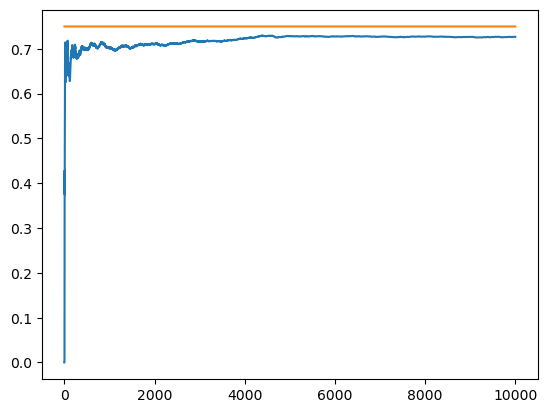

In [4]:
def epsilon_greedy(bandits, epsilon):
    # True => Explore, False = Exploit
    if np.random.random() < epsilon:
        return np.random.randint(len(bandits)), True
    else:
        return np.argmax([b.p_hat for b in bandits]), False


def experiment():
    NUM_TRIALS = 10000
    EPS = 0.1
    BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    optimal_j = np.argmax([b.p for b in bandits])
    print(f"Optimal j: {optimal_j}")

    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0

    for i in range(NUM_TRIALS):

        # Use epsilon-greedy to select the next bandit
        j, explore = epsilon_greedy(bandits, EPS)

        if explore:
            num_times_explored += 1
        else:
            num_times_exploited += 1

        if j == optimal_j:
            num_optimal += 1

        # Pull the arm for the bandit with the largest sample
        x = bandits[j].pull()

        # Update rewards history
        rewards[i] = x

        # Update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)

    # Print mean estimation for each bandit
    for b in bandits:
        print(f"mean estimate: {b.p_hat}")

    # Print total reward
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num_times_explored:", num_times_explored)
    print("num_times_exploited:", num_times_exploited)
    print("num times selected optimal bandit:", num_optimal)

    # plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()


experiment()